# **PRÁCTICA 4:  Deep Learning - Parte 2: RNN**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio 4: Haz un modelo que use la capa Bidirectional: https://keras.io/api/layers/recurrent_layers/bidirectional/** 




# Laboratorio

Vamos a hacer predicción del valor de un activo financiero de una empresa a partir del valor de los días anteriores de varias compañías.

In [ ]:
# Importamos librerías
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, LSTM, GRU, Bidirectional
from tensorflow.keras.layers import Input
from keras.callbacks import History 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

Para leer datos lo mejor es usar la toolbox pandas

Los datos se han sacado de:
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3

In [ ]:
dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
dd_aa = pd.read_csv("aa.us.txt", delimiter=",")
dd_iae = pd.read_csv("iae.us.txt", delimiter=",")

In [ ]:
googl_op = dd_googl['Open'].values
aa_op = dd_aa['Open'].values
iae_op = dd_iae['Open'].values

In [ ]:
aa = dd_googl['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_aa['Date'].values
aa_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    aa_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_iae['Date'].values
iae_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    iae_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
print(googl_indice.shape)
print(googl_op.shape)

(3333,)
(3333,)


In [ ]:
indices = set(googl_indice) & set(aa_indice) & set(iae_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_op[ii]
ii = np.in1d(aa_indice,list(indices))
data_aa = aa_op[ii]
ii = np.in1d(iae_indice,list(indices))
data_iae = iae_op[ii]

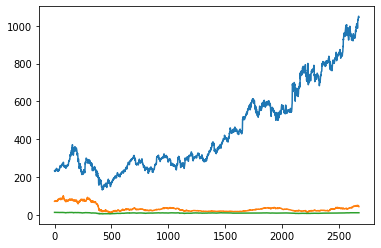

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(data_googl)
plt.plot(data_aa)
plt.plot(data_iae)

In [ ]:
DAT = np.zeros((data_googl.shape[0],3))
DAT[:,0] = data_googl
DAT[:,1] = data_aa
DAT[:,2] = data_iae          

In [ ]:
DAT.shape

(2678, 3)

In [ ]:
LAG = 5
DAT_TS = np.zeros((DAT.shape[0]-LAG,LAG,DAT.shape[1]))

for ii in range(0,DAT.shape[0]-LAG):
    DAT_TS[ii,:,:] = DAT[ii:ii+LAG,:]  

In [ ]:
DAT_TS.shape

(2673, 5, 3)

In [ ]:
Ntr = np.floor(DAT_TS.shape[0]/2)
Y_target = 0

XX_tr = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
XX_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG-1,:]

YY_tr = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]
YY_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG-1,Y_target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [ ]:
XX_tr.shape

(1336, 4, 3)

## MODELO

In [ ]:
model = Sequential()
model.add(Input(shape=(4,3)))
model.add(Conv1D(20, kernel_size=2,  activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True, activation="relu")))
model.add(Flatten())
model.add(Dense(1))

In [ ]:
#learning_rate: la longitud de paso del algoritmo
#momentum: velocidad de descenso al gradiente
model.compile(optimizer=Adam(learning_rate=0.0001), loss="mae") 
#model.compile(optimizer=SGD(learning_rate=..., momentum=...), loss="mae")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 20)             140       
                                                                 
 bidirectional (Bidirectiona  (None, 3, 40)            6560      
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 6,821
Trainable params: 6,821
Non-trainable params: 0
_________________________________________________________________


## Evaluación

In [ ]:
history = History()
model.fit(XX_tr, YY_tr, batch_size=32, epochs=80, validation_split=0.3,
          verbose=0, callbacks=[history]) #validation_data=(XX_ts, YY_ts)

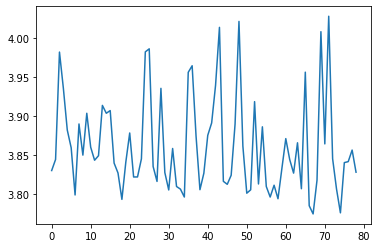

In [ ]:
loss_ev = history.history['loss']

%matplotlib inline
plt.figure()
# Evolución del MAE
plt.plot(loss_ev[0:-1])
plt.plot(history.history["val_loss"])

In [ ]:
score = model.evaluate(XX_tr, YY_tr, verbose=0)
score

3.6968047618865967

In [ ]:
y_hat = model.predict(XX_tr)
np.mean(abs(y_hat[:,0]-YY_tr))

3.6968035011519924

In [ ]:
y_hat.shape

(1336, 1)

## TEST

In [ ]:
y_hat = model.predict(XX_ts)
np.mean(abs(y_hat[:,0]-YY_ts))

7.442393713790379

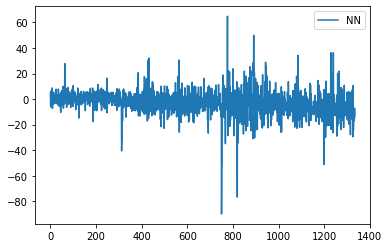

In [ ]:
%matplotlib inline
plt.figure()
# Predición en el entrenamiento 
plt.plot(y_hat[:,0]-YY_ts, label='NN')
plt.legend()

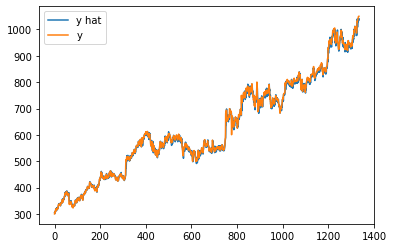

In [ ]:
plt.figure()
# Predición en el test 
plt.plot(y_hat[:,0], label='y hat')
plt.plot(YY_ts, label='y')
plt.legend()